# Win Prediction
               - Imarticus DSP_Online_02 Group K

#### Steps to be followed:
1. Understanding the problem and Objectives
2. Understand the data/ Develop some business sense
3. Exploratory Data Analysis
4. Provide the results and understanding you got by performing exploratory data analysis.
5. Data Cleaning
6. Model building (trying various techniques and at the end justify why you choose a technique over the others)
7. Testing and cross validation
8. Recommending top 5 combination of SBU Head-Bid Manager.
9. For every false prediction calculate the loss which the company will face.
10. Find the results, recommendation and visualizations
11. Bonus: Any other insight or recommendation that you can give from the data which will help the business(optional)
12. Preparing the deck

## Step 1: Understand the problem and objectives

### Overview Of the problem


You have been provided with a single file which contains data related to the projects/deals won or lost.   
This data contains the project category, price and sector from 2011 to 2018.

### Objective 1: 
Predictive Analytics - Build a ML model to predict the probability of win/loss for bidding activities for a potential client.

### Objective 2: 
Prescriptive Analytics – Identify variable/s that are most likely to help in converting an opportunity into a win.

## Step 2: Understanding the Data

In [1]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Reading the data
df = pd.read_excel('Win_Prediction_Data.xlsx')
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [3]:
# Preliminary Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


- There are few null values in the Client Category column.
- Deal Date column is already in datetime format. Hence, no need to convert it.

In [4]:
# Numerical Analysis
df.describe().round(2)

,Deal Cost
count,10061.00
mean,766896.87
std,1619893.80
min,0.00
25%,189705.88
50%,382352.94
75%,764705.88
max,36764705.88


- Only one numerical column.
- Standard Deviation is more than twice the mean.
- Some deal costs are 0.

## Step 3: Exploratory Data Analysis

But to do that, we first need to understand the data well.  
As the number of features are low, we will perform two kinds of analysis.  
1. First is Univariate analysis where we will see the distribution of each feature with itself.  
2. Second is Bivariate analysis where we will see the relation of the feature with target variable.  
3. Third is realtion of feature with combination of Win Loss split and Deal Cost.  

#### 1. Analysis of Client Category feature

In [5]:
df['Client Category'].value_counts()

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

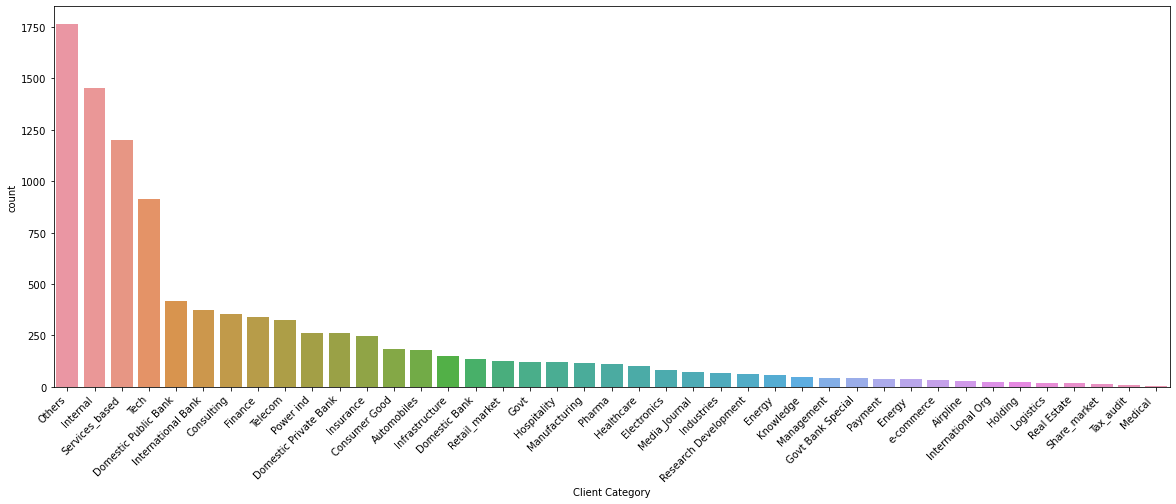

In [6]:
plt.figure(figsize = (20,7))
sns.countplot(df['Client Category'],
              order = df['Client Category'].value_counts().index)
plt.xticks(rotation = 45, ha = "right");

Client Category with Win/Loss

In [7]:
?palette

Object `palette` not found.


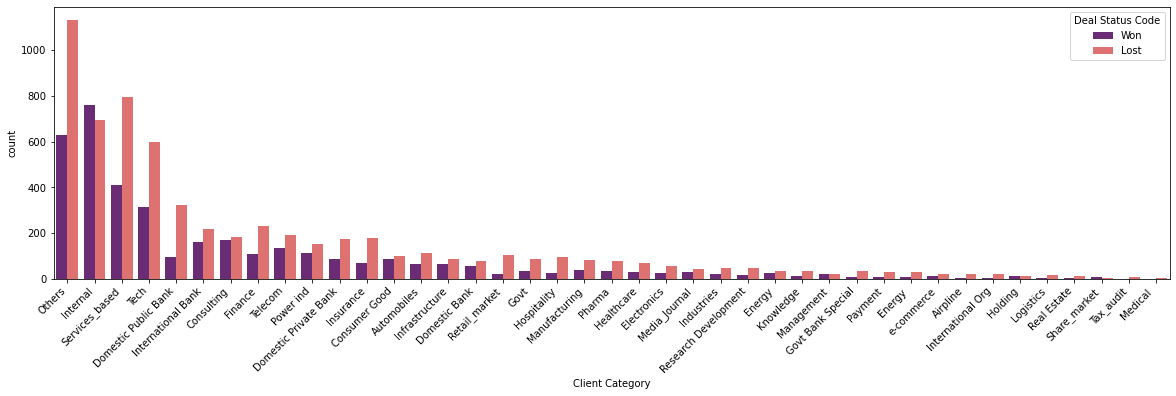

In [8]:
plt.figure(figsize = (20,5))
sns.countplot(df['Client Category'], 
              hue = df['Deal Status Code'], 
              order = df['Client Category'].value_counts().index,
             palette = "magma")
plt.xticks(rotation = 45, ha = "right");

We see that numerous categories have very few observation.  
Moving forward, we will choose the top 20 observations.

Let's automate the plots.

In [9]:
def uni_barplot(x):
    plt.figure(figsize = (20,5))
    ax = sns.countplot(df[x],
                 order = df[x].value_counts().nlargest(20).index,
                 color = "#69d")
    plt.xticks(rotation = 45, ha = "right")
    plt.title('Top 20 categories of {} column'.format(x))
    
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()/100.61), (p.get_x()+0.15, p.get_height()*1.005));

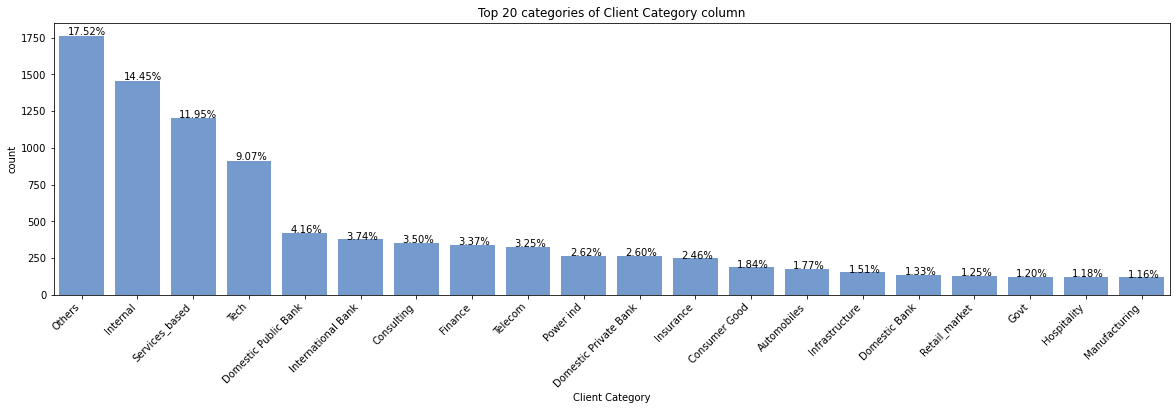

In [10]:
uni_barplot('Client Category')

In [11]:
def bi_barplot(x):
    plt.figure(figsize = (20,5))
    ax = sns.countplot(df[x],
                  hue = df['Deal Status Code'],
                 order = df[x].value_counts().nlargest(20).index,
                    palette = "magma")
    plt.xticks(rotation = 45, ha = "right")
    plt.title('Split of Win and Loss of {} column'.format(x))
    
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.05, p.get_height()+2));

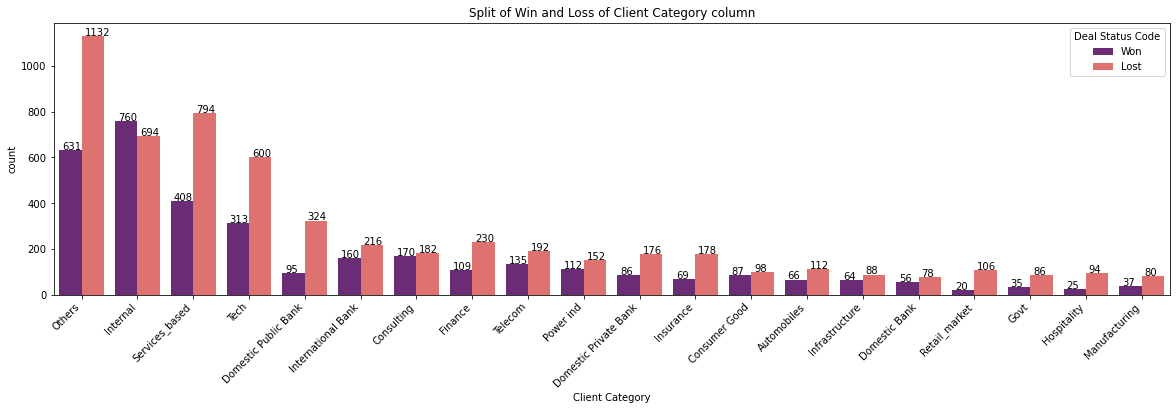

In [12]:
bi_barplot('Client Category')

In [13]:
def multi_barplot(x):
    plt.figure(figsize = (20,5))
    sns.barplot(df[x], 
                y = df['Deal Cost'],
              hue = df['Deal Status Code'], 
              order = df[x].value_counts().nlargest(20).index,
               palette = "nipy_spectral")
    plt.xticks(rotation = 45, ha = "right")
    plt.title('Average Deal Cost by {} category'.format(x));

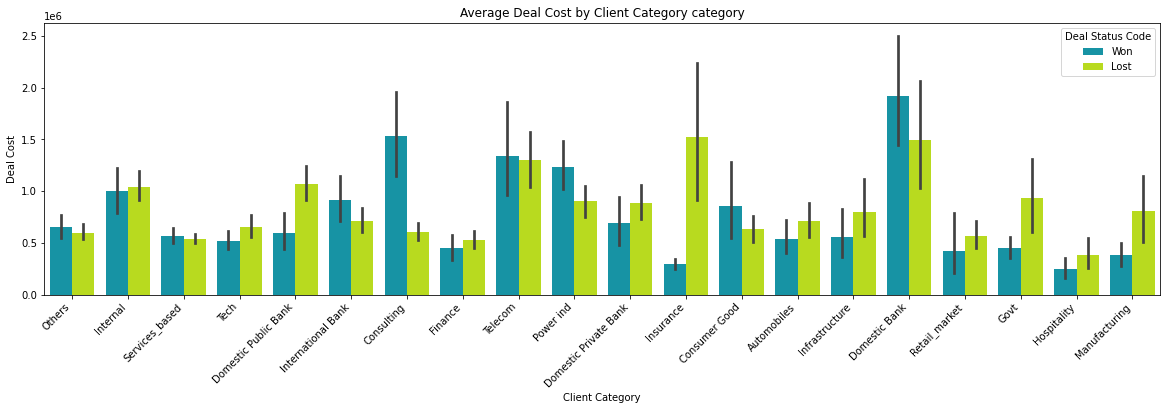

In [14]:
multi_barplot('Client Category')

In [15]:
def combined_plot(x):
    uni_barplot(x)
    bi_barplot(x)
    multi_barplot(x)

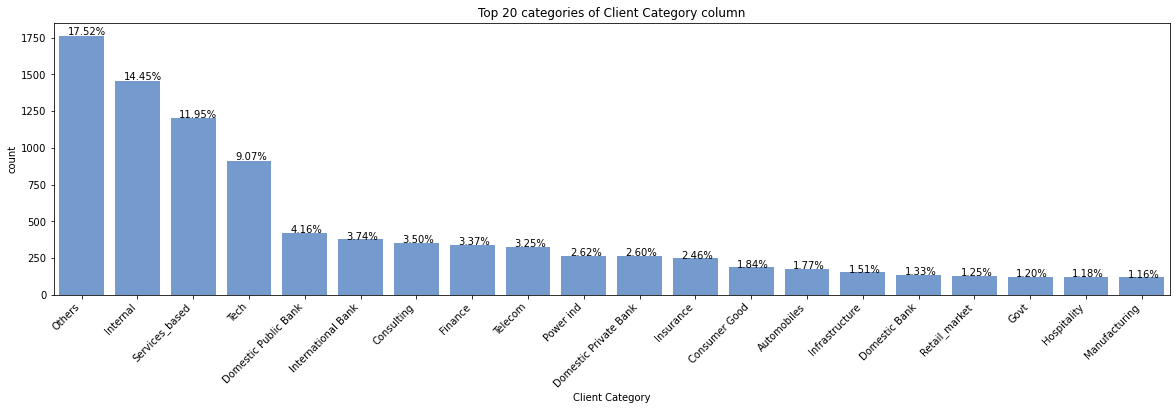

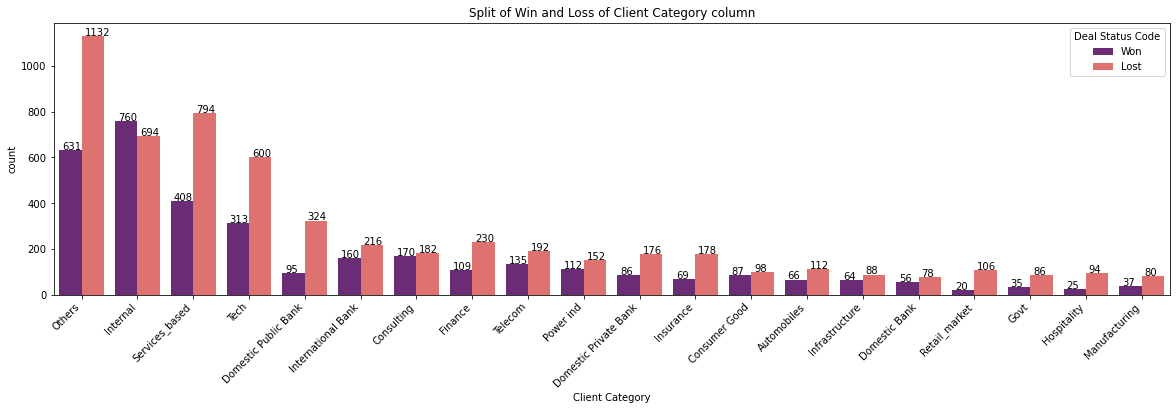

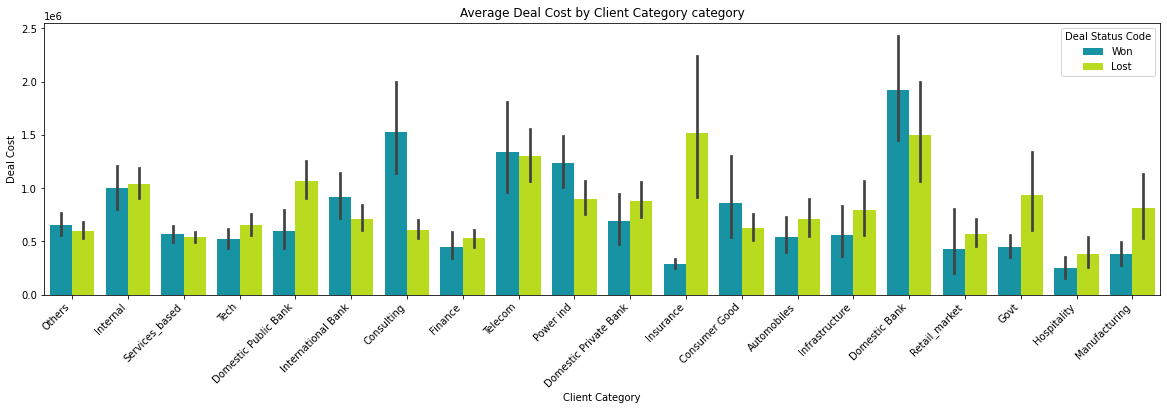

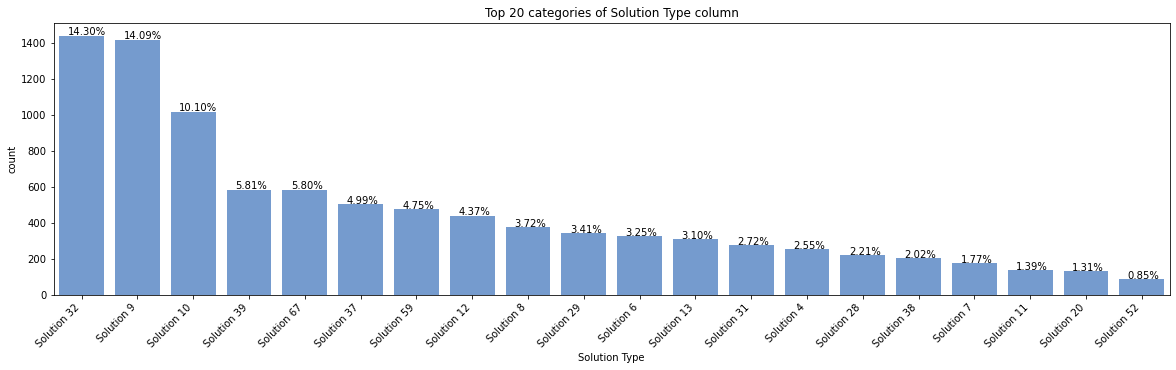

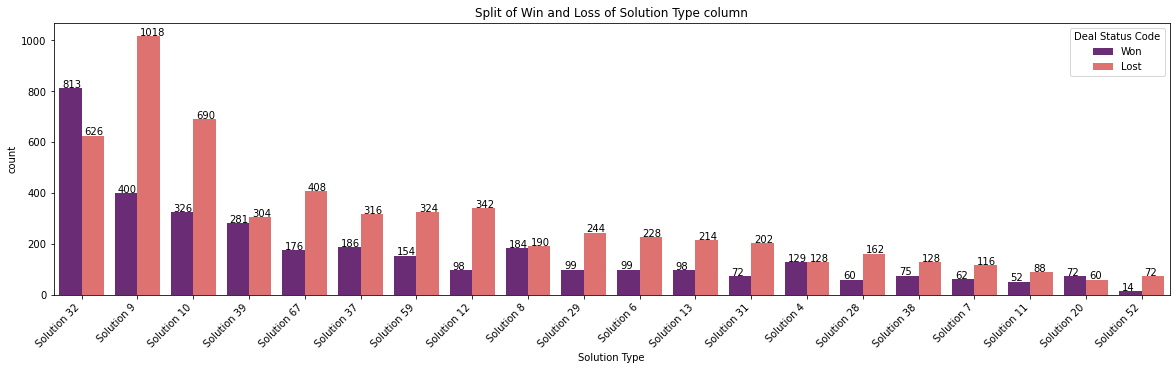

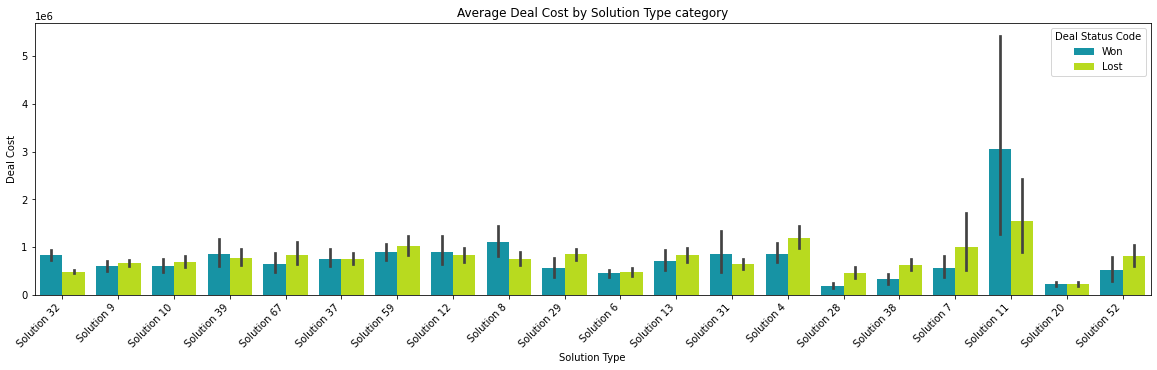

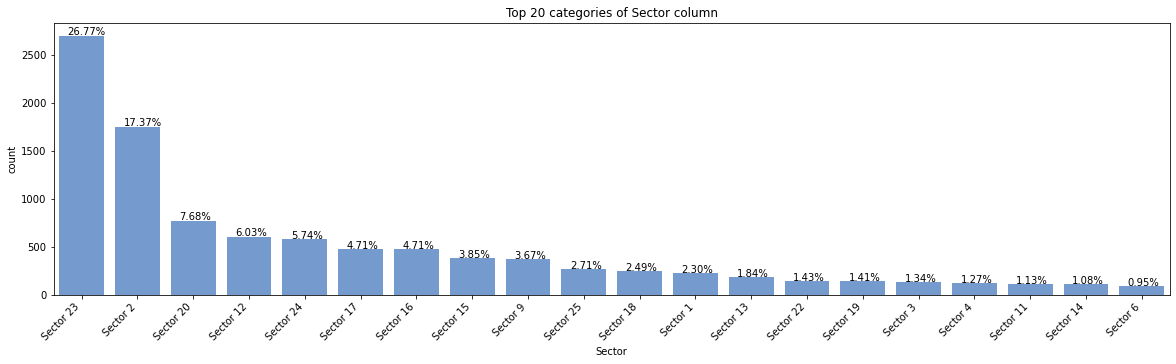

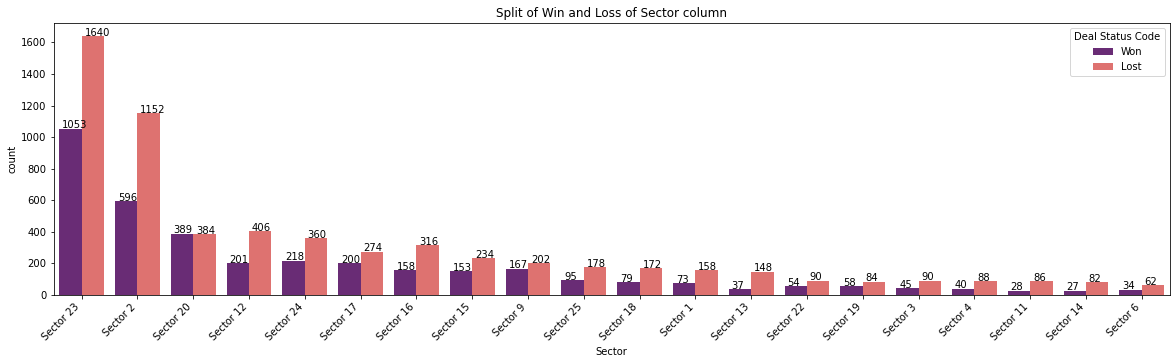

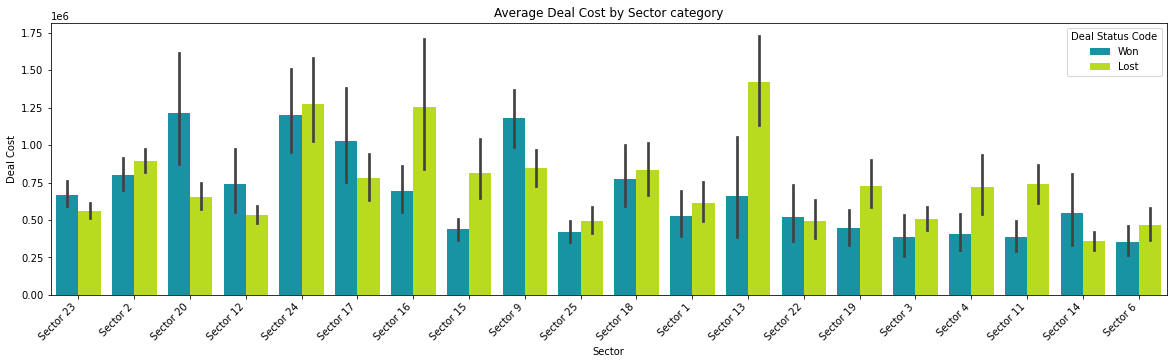

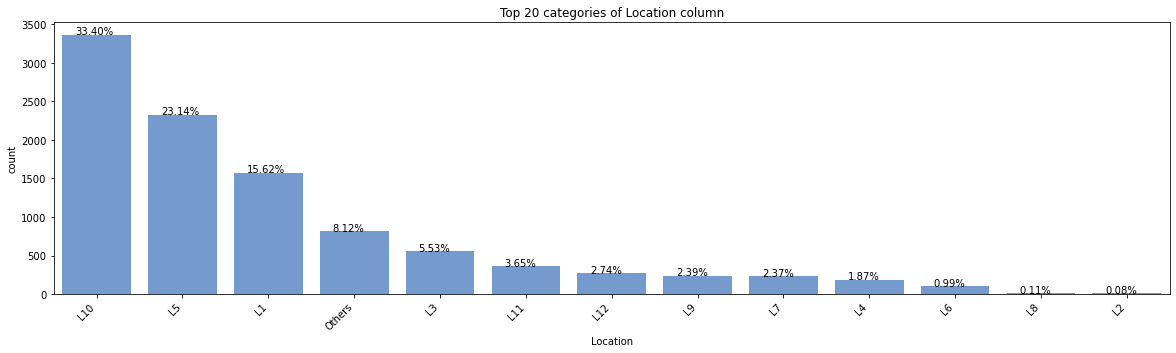

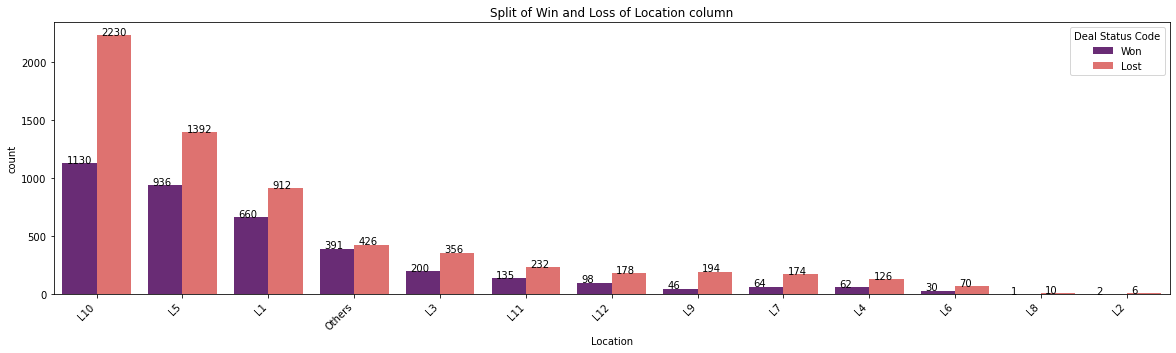

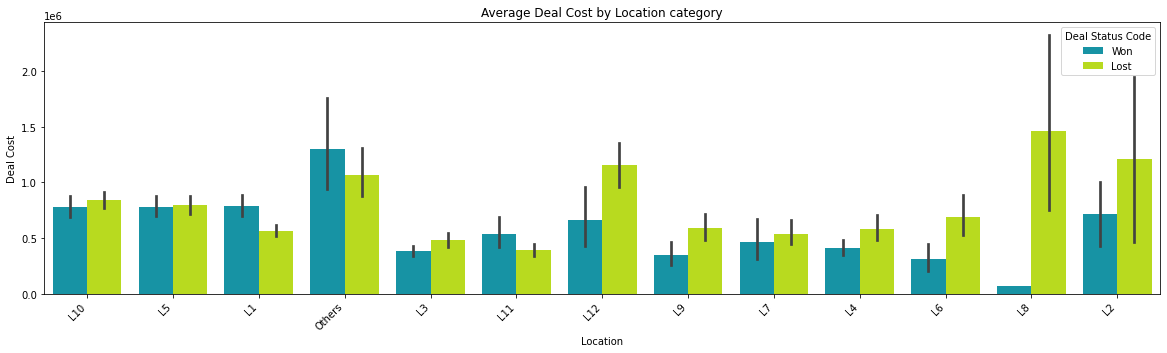

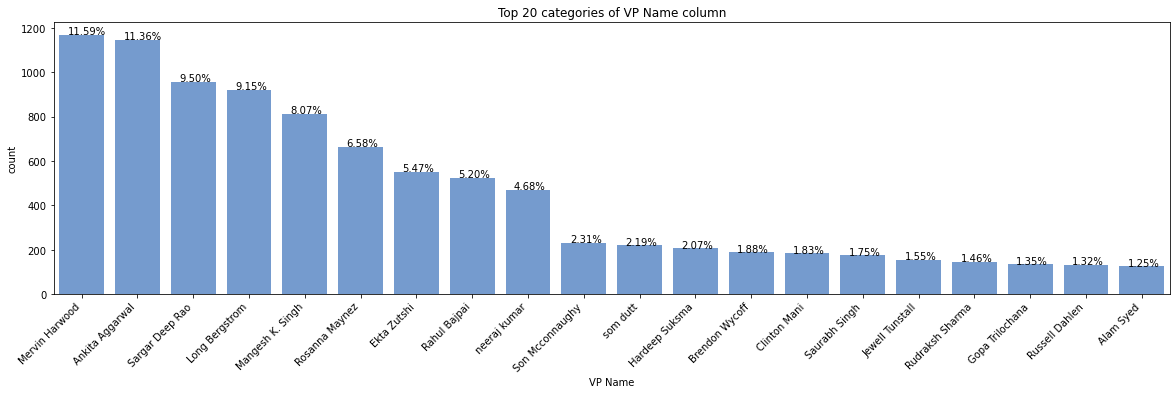

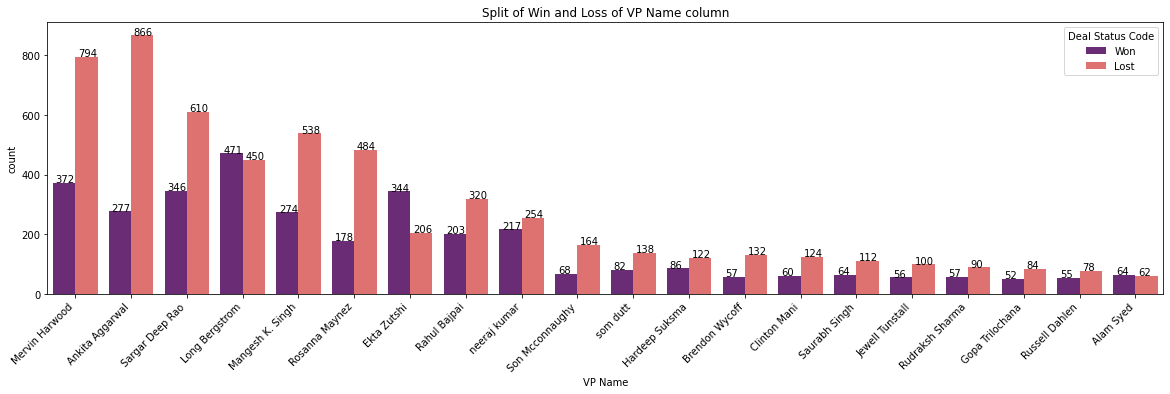

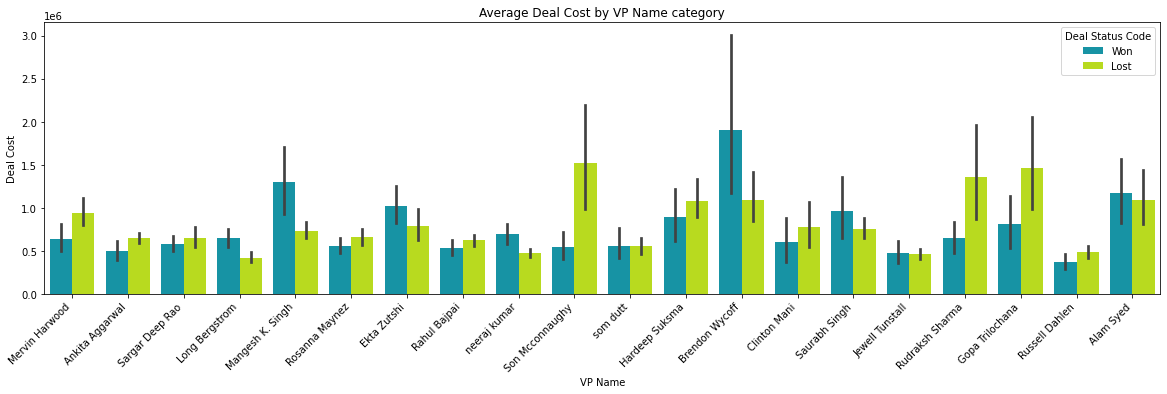

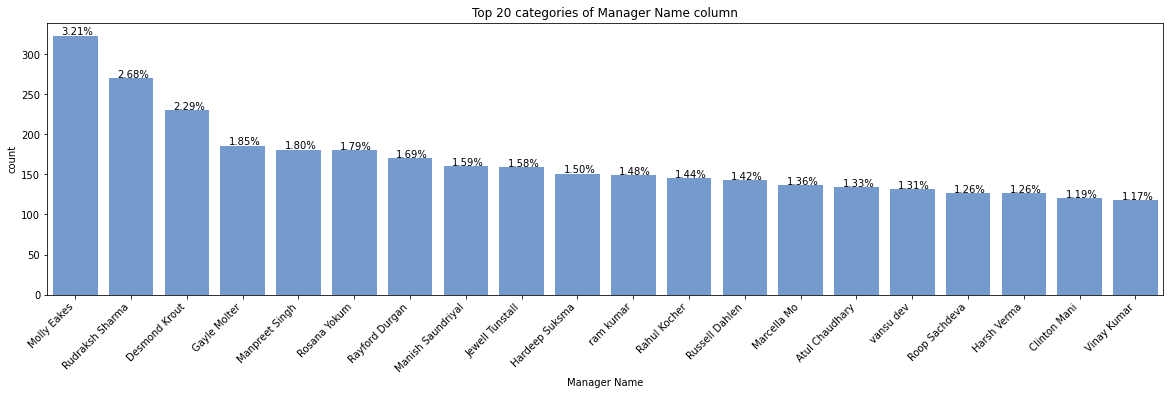

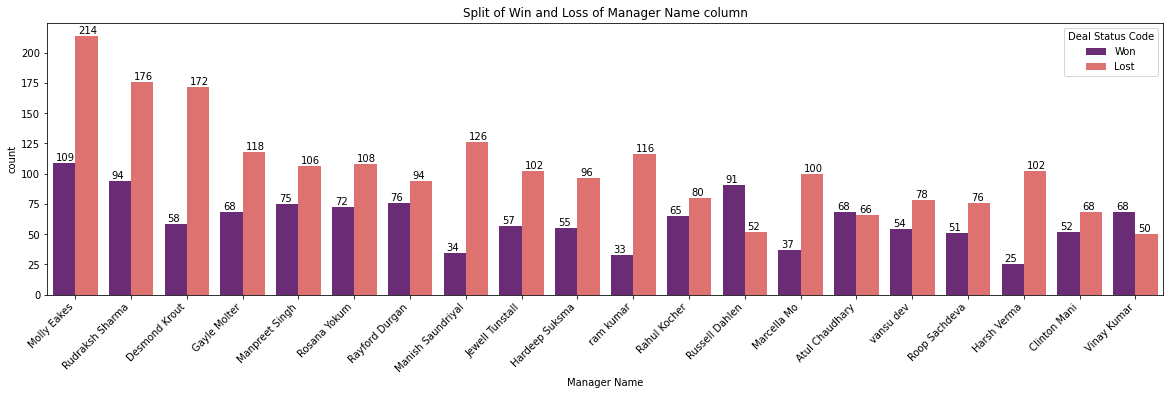

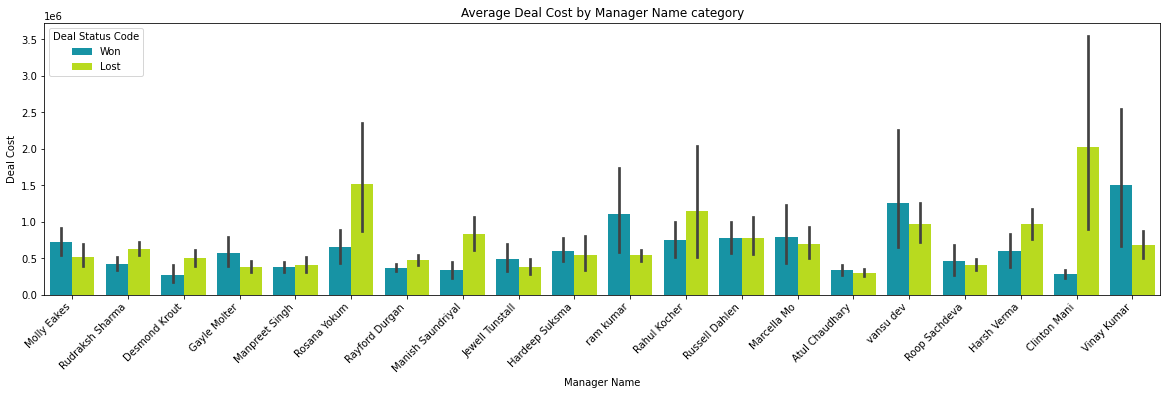

In [16]:
for col in df.drop('Deal Status Code', axis = 1).select_dtypes(include = "object"):
    combined_plot(col);

Observations from the charts:
- In the above chart, we see that the 'Won' proportion for 'Internal' Client Category is higher than other categories.

In [17]:
df['VP and Manager'] = df['VP Name'] + ' + ' + df['Manager Name']
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,VP and Manager
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,Ekta Zutshi + Gopa Trilochana
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,Ekta Zutshi + Gopa Trilochana
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta Zutshi + Russell Dahlen
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta Zutshi + Russell Dahlen
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,Ekta Zutshi + Russell Dahlen


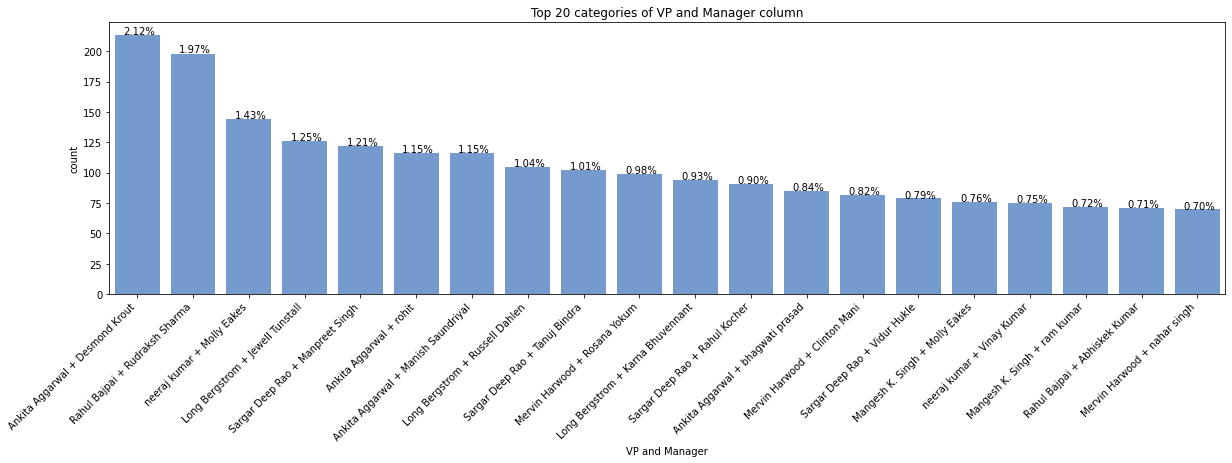

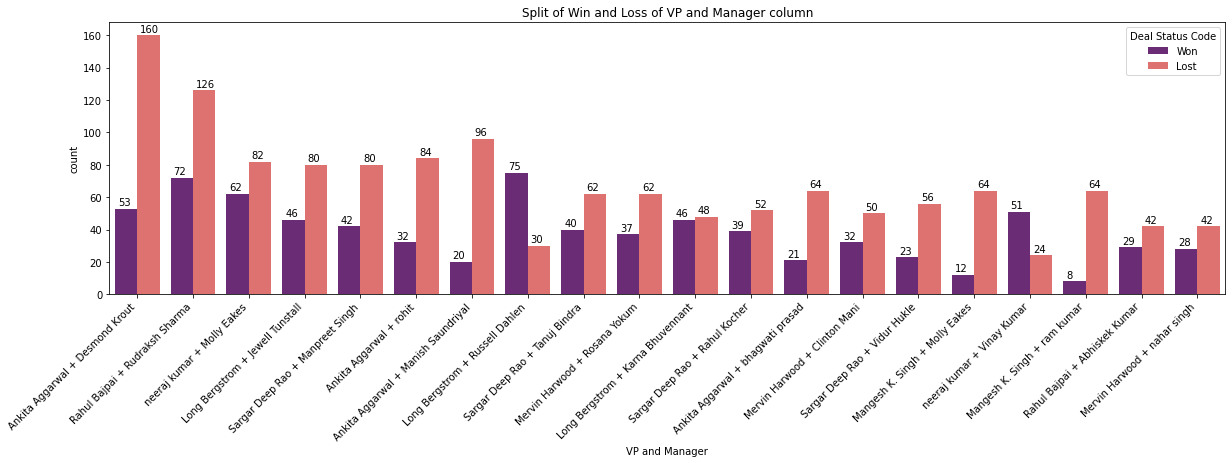

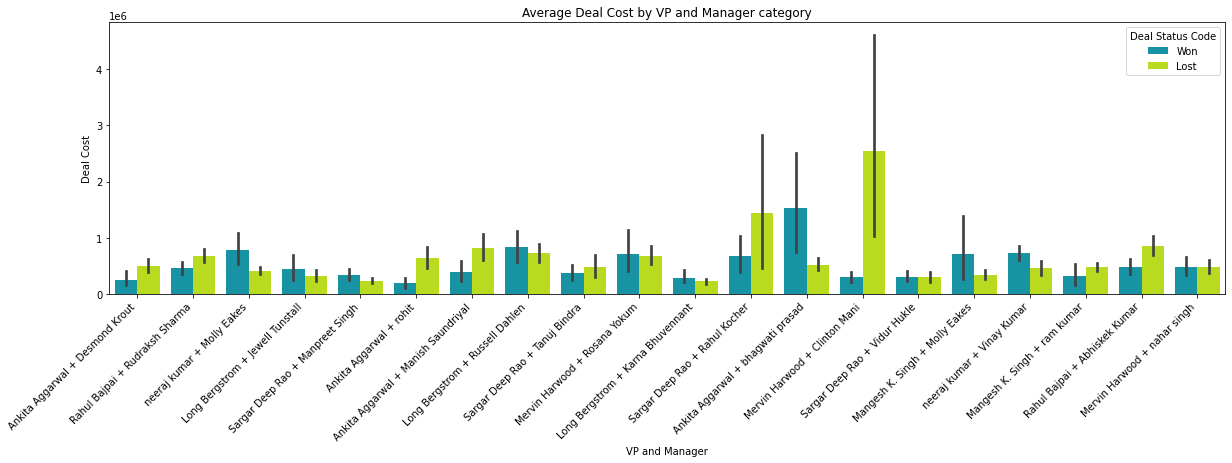

In [18]:
combined_plot('VP and Manager')

#### Analysis of Deal Date

In [19]:
df['MONTH'] = pd.DatetimeIndex(df['Deal Date']).month_name()
df['MONTH'].value_counts()

October      951
December     950
November     936
January      896
September    871
July         837
August       830
February     780
May          775
March        754
April        743
June         738
Name: MONTH, dtype: int64

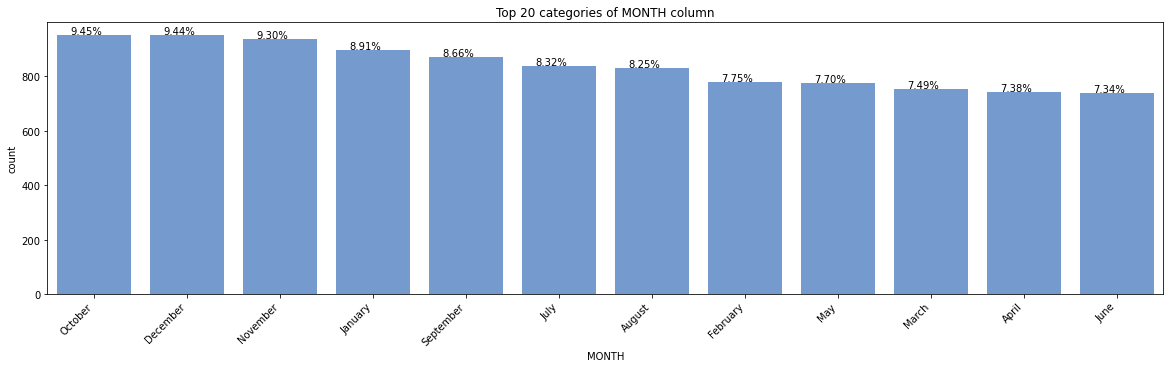

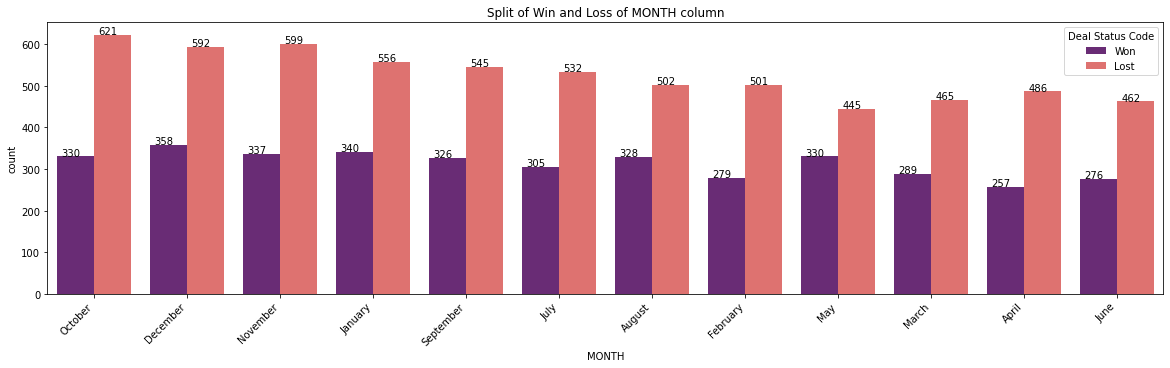

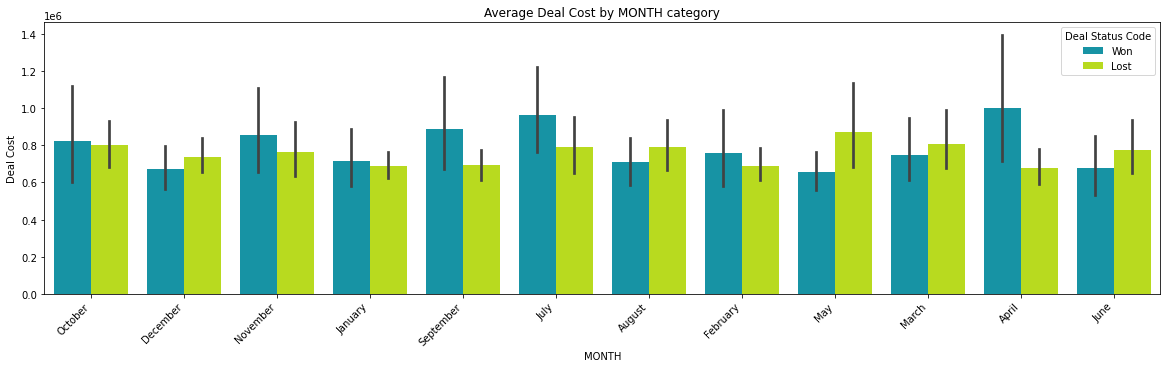

In [20]:
combined_plot('MONTH')

As expected, the months near the calender year end, i.e December, has the most number of Deals.

#### Bi-variate analysis of Deal Cost and Client Category

<AxesSubplot:xlabel='Deal Status Code', ylabel='Deal Cost'>

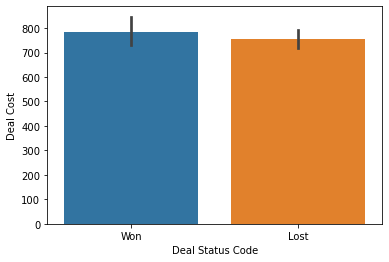

In [21]:
sns.barplot(data = df, x = 'Deal Status Code', y = df['Deal Cost']/1000)

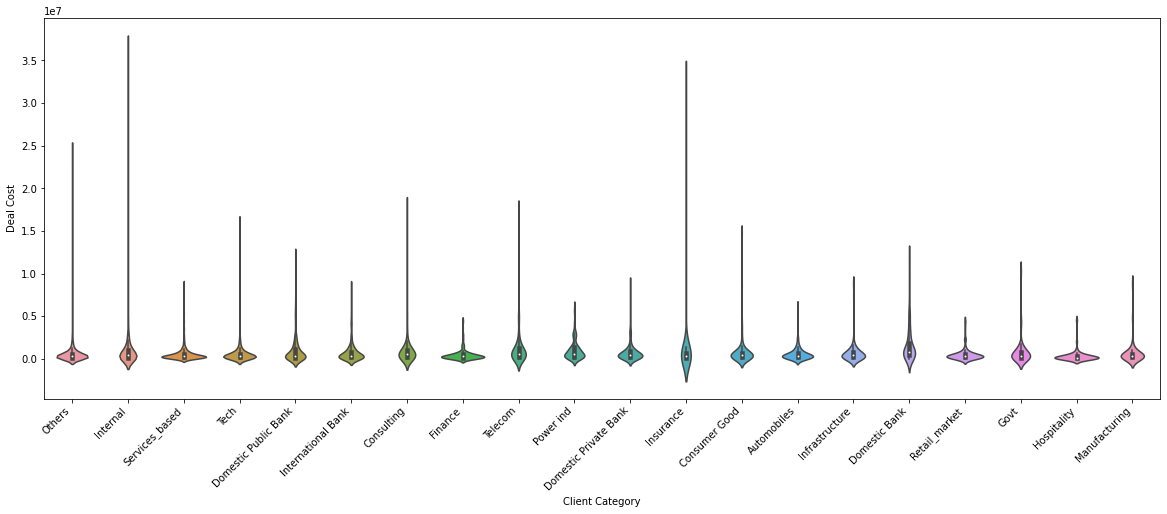

In [22]:
plt.figure(figsize = (20,7))
sns.violinplot(data = df, y = 'Deal Cost', x = 'Client Category',
           order = df['Client Category'].value_counts().nlargest(20).index)
plt.xticks(rotation = 45, ha = "right");

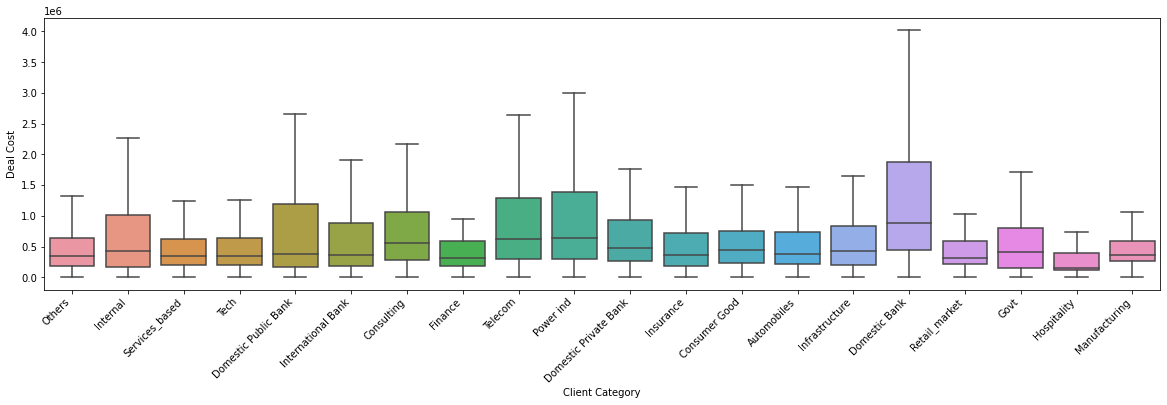

In [23]:
# As the above graph is not comprehensible, lets make another without outliers and only the major ones. 
plt.figure(figsize = (20,5))
sns.boxplot(data = df, y = 'Deal Cost', x = 'Client Category', 
            showfliers=False, 
            order = df['Client Category'].value_counts().nlargest(20).index)
plt.xticks(rotation = 45, ha = "right");

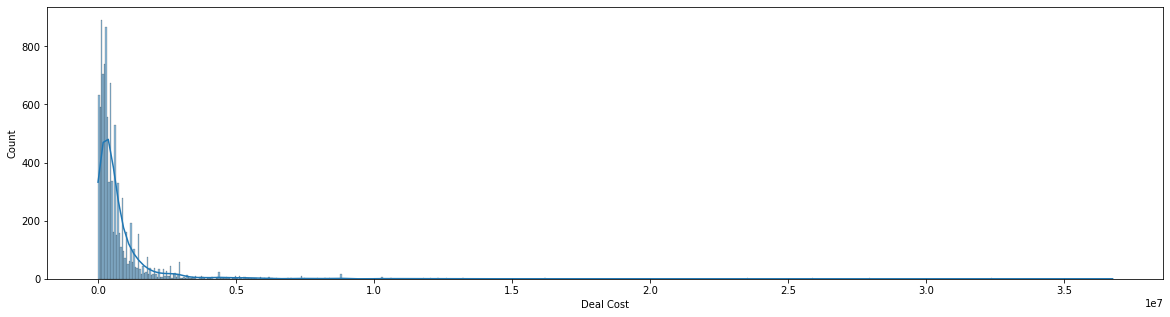

In [24]:
plt.figure(figsize = (20,5))
sns.histplot(df['Deal Cost'], kde = True);

## Step 4: Observations from EDA

From the above done EDA, few observations can be made
1. Most of the deals are concentrated on handful of categories.
2. More Deals have been lost than they have been won.
3. VP and Manager combination of Long Bergstrom and Russel Dahlen has highest number of Deal wins.
4. Ankita Agarwal and Desmond Krout have the highest number of Deals (Win and Loss).

## Step 5 in Data Cleaning - Variable selection

### Handling Missing Values

Let's first check the frequency of categories in each categorical variable

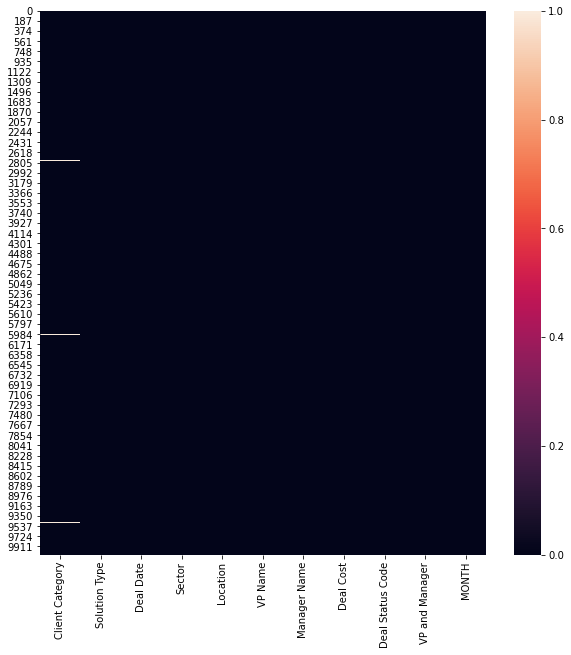

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isna());

In [26]:
df.isna().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
VP and Manager       0
MONTH                0
dtype: int64

In [27]:
df[df['Client Category'].isna()].head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,VP and Manager,MONTH
488,NaN,Solution 7,2018-10-05,Sector 12,L10,Ankita Aggarwal,Kizzie Troxel,441176.47,Lost,Ankita Aggarwal + Kizzie Troxel,October
491,NaN,Solution 7,2019-01-06,Sector 12,L10,Ankita Aggarwal,Kizzie Troxel,441176.47,Lost,Ankita Aggarwal + Kizzie Troxel,January
518,NaN,Solution 10,2012-01-12,Sector 19,L10,Mangesh K. Singh,Hardeep Suksma,38235.29,Won,Mangesh K. Singh + Hardeep Suksma,January
732,NaN,Solution 10,2013-11-08,Sector 23,L10,Rosanna Maynez,Sohil Kumar,58823.53,Won,Rosanna Maynez + Sohil Kumar,November
1128,NaN,Solution 37,2013-09-27,Sector 24,L10,Mervin Harwood,Marcelo Riles,311764.71,Lost,Mervin Harwood + Marcelo Riles,September


Let us see if we can find any pattern among the other features where value is na.

In [28]:
for col in df.select_dtypes(include = 'object'):    
    print(df[df['Client Category'].isna()][col].value_counts(), '\n')

Series([], Name: Client Category, dtype: int64) 

Solution 32    12
Solution 37    12
Solution 67    10
Solution 29     9
Solution 10     7
Solution 9      7
Solution 12     5
Solution 6      4
Solution 31     2
Solution 8      2
Solution 4      2
Solution 7      2
Solution 28     1
Solution 39     1
Solution 38     1
Solution 42     1
Solution 14     1
Name: Solution Type, dtype: int64 

Sector 24    28
Sector 19    15
Sector 12    10
Sector 23     8
Sector 6      6
Sector 3      4
Sector 15     4
Sector 20     2
Sector 5      2
Name: Sector, dtype: int64 

L10    79
Name: Location, dtype: int64 

Mangesh K. Singh    13
Ankita Aggarwal     13
Long Bergstrom      12
Mervin Harwood      10
Rahul Bajpai         6
Russell Dahlen       6
Son Mcconnaughy      6
Gopa Trilochana      3
Sargar Deep Rao      2
neeraj kumar         2
Prashant Rawat       2
som dutt             1
Rosanna Maynez       1
Clinton Mani         1
Jewell Tunstall      1
Name: VP Name, dtype: int64 

Vaibhav singh      

Through this we notice that Location for all the null values is L10.

Let's look at the Location L10 category deeper.

In [29]:
df[df['Location']=='L10'].head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,VP and Manager,MONTH
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won,Mervin Harwood + rahul sharma,November
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won,Lilli Storrs + Md. Daud,April
10,International Bank,Solution 6,2012-02-11,Sector 2,L10,Long Bergstrom,Luv Malhotra,316176.47,Won,Long Bergstrom + Luv Malhotra,February
16,Domestic Public Bank,Solution 59,2011-10-29,Sector 2,L10,Mervin Harwood,Prateek Dhotre,2764705.88,Won,Mervin Harwood + Prateek Dhotre,October
17,Consumer Good,Solution 37,2012-03-04,Sector 12,L10,Lilli Storrs,Md. Daud,147058.82,Won,Lilli Storrs + Md. Daud,March
26,Consulting,Solution 32,2012-01-25,Sector 23,L10,Mangesh K. Singh,Mangesh K. Singh,279411.77,Won,Mangesh K. Singh + Mangesh K. Singh,January
32,Manufacturing,Solution 7,2014-11-04,Sector 15,L10,Rosanna Maynez,Saurabh Singh,588235.29,Lost,Rosanna Maynez + Saurabh Singh,November
34,Manufacturing,Solution 7,2015-05-05,Sector 15,L10,Rosanna Maynez,Saurabh Singh,588235.29,Lost,Rosanna Maynez + Saurabh Singh,May
35,Retail_market,Solution 7,2015-02-05,Sector 20,L10,Mervin Harwood,nahar singh,294117.65,Lost,Mervin Harwood + nahar singh,February
38,Consumer Good,Solution 37,2011-12-17,Sector 12,L10,Lilli Storrs,Md. Daud,411764.71,Won,Lilli Storrs + Md. Daud,December


In [30]:
df[df['Location']=='L10']['Client Category'].value_counts()

Others                   492
Services_based           344
Domestic Public Bank     327
International Bank       243
Internal                 223
Tech                     196
Finance                  196
Domestic Private Bank    157
Insurance                116
Telecom                   96
Power ind                 74
Infrastructure            71
Domestic Bank             65
Retail_market             59
Pharma                    56
Consumer Good             52
Govt                      50
Media_Journal             48
Management                43
Automobiles               43
Consulting                42
Govt Bank Special         41
Healthcare                33
Manufacturing             30
Payment                   28
Industries                27
Hospitality               27
Share_market              14
Holding                   14
Logistics                 11
Electronics               11
Airpline                  10
Knowledge                  9
Energy                     9
International 

This direction didn't give us much results.

Still there isn't much information we can take from this.  
In light of this information, we can choose to drop those rows altogether or impute it with the mode value.  
Before we decide that, lets see how much impact does the volume of null values have.

In [31]:
print("The proportion of null values to the total data is {:.3f}%".format(79/len(df)))

The proportion of null values to the total data is 0.008%


Considering this, we will fill the null values with mode as we do not want to lose any data.

In [32]:
df = df.fillna(df.mode)
df.shape

(10061, 11)

In [33]:
df.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
VP and Manager      0
MONTH               0
dtype: int64

### Step 6: Model Building

### I. Grouping Lower frequency into 'Other' Category

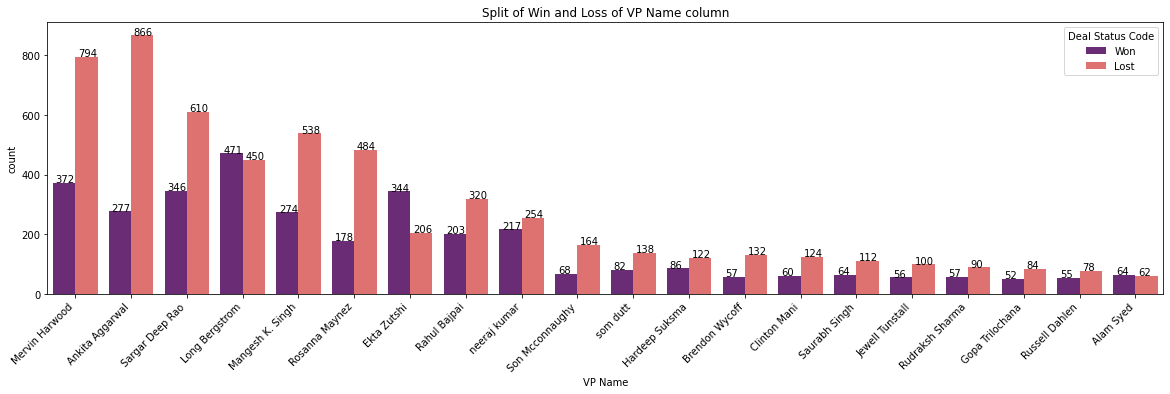

In [34]:
bi_barplot('VP Name')

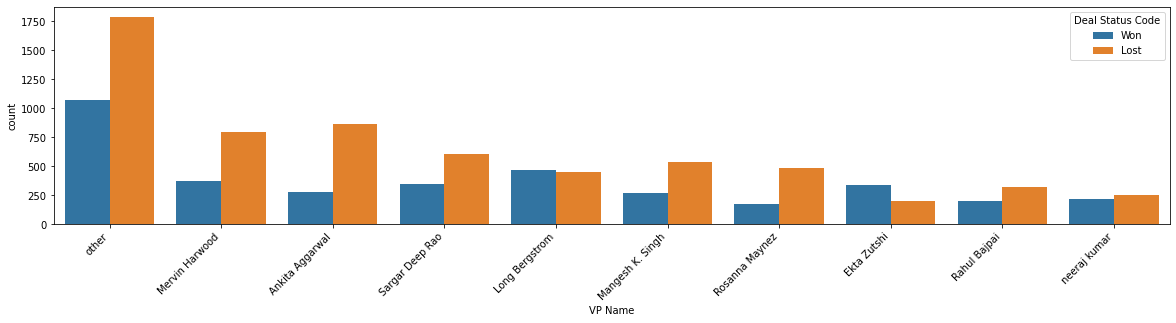

In [35]:
df_x = df['VP Name'].where(df.groupby('VP Name')['VP Name'].transform('size') > 300, 'other')
plt.figure(figsize = (20,4))
sns.countplot(df_x, 
              hue = df['Deal Status Code'],
             order = df_x.value_counts().nlargest(20).index)
plt.xticks(rotation = 45, ha = "right");

- As can be seen from the plots above, it may not be wise to group categories with lower frequency to 'Other'.  
- This will make the 'Other' VP Name to be the dominant player, which is not the case.

### II. By Feature Selection and Eliminating underperformers

- Considering the EDA done earlier, we see that most of the VP contribute to very less number of deals.  
- Even if the deal cost is high, the low quantity outweighs it.  
- Hence, it may be a good idea to remove all the VP who return less than say 300 deals.

In [36]:
VP_count = df['VP Name'].value_counts()
VP_Names = VP_count[VP_count > 300].index.tolist()
df_new = df[df['VP Name'].isin(VP_Names)]
df_new.shape

(7204, 11)

In [37]:
for col in df_new.select_dtypes(include = "object"):
    print(col)
    print(df_new[col].value_counts())

Client Category
Others                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

As we have incorporated Deal Date using Month feature, we no longer need Deal Date.  
We also do not require 'VP Name" and "Manager" as we incorporated them using "VP and Manager".  
Hence we will drop that column.  

In [38]:
df = df.drop(['Deal Date', "VP Name","Manager Name"], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Client Category   10061 non-null  object 
 1   Solution Type     10061 non-null  object 
 2   Sector            10061 non-null  object 
 3   Location          10061 non-null  object 
 4   Deal Cost         10061 non-null  float64
 5   Deal Status Code  10061 non-null  object 
 6   VP and Manager    10061 non-null  object 
 7   MONTH             10061 non-null  object 
dtypes: float64(1), object(7)
memory usage: 628.9+ KB


### III. Performing Frequency Encoding

Performing Frequency encoding on the categorical variables

In [39]:
# Split data in X and y
X = df.drop('Deal Status Code', axis = 1)
y = df['Deal Status Code']

In [40]:
for col in X.select_dtypes(include = "object"):
    freq_encode = (X.groupby(col).size())/len(X)
    X[col] = X[col].map(freq_encode)
X.head()

,Client Category,Solution Type,Sector,Location,Deal Cost,VP and Manager,MONTH
0,0.032502,0.017692,0.057450,0.231389,150000.00,0.003280,0.074943
1,0.032502,0.017692,0.057450,0.231389,744705.88,0.003280,0.086572
2,0.144518,0.047510,0.076831,0.081205,60000.00,0.000398,0.082497
3,0.144518,0.047510,0.076831,0.081205,60000.00,0.000398,0.073850
4,0.144518,0.143028,0.076831,0.081205,80882.35,0.000398,0.073353


In [41]:
y.head()

0     Won
1     Won
2    Lost
3    Lost
4    Lost
Name: Deal Status Code, dtype: object

Let's calculate density of Deal Cost just as it is for other variables.

In [42]:
X['Deal Cost'] = X['Deal Cost']/sum(X['Deal Cost'])
X.head()

,Client Category,Solution Type,Sector,Location,Deal Cost,VP and Manager,MONTH
0,0.032502,0.017692,0.057450,0.231389,0.000019,0.003280,0.074943
1,0.032502,0.017692,0.057450,0.231389,0.000097,0.003280,0.086572
2,0.144518,0.047510,0.076831,0.081205,0.000008,0.000398,0.082497
3,0.144518,0.047510,0.076831,0.081205,0.000008,0.000398,0.073850
4,0.144518,0.143028,0.076831,0.081205,0.000010,0.000398,0.073353


#### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7545, 7), (2516, 7), (7545,), (2516,))

### Step 7: Testing and Cross Validation

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
def algo(algorithm):
    model = algorithm()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('The accuracy of {} model is {}'.format(model, accuracy_score(y_test, preds).round(2)))
    print("\n")
    print("CLASSIFICATION REPORT",'\n',classification_report(y_test, preds),"\n")
    print("CONFUSION MATRIX",'\n')
    plot_confusion_matrix(model, X_test, y_test, cmap = "GnBu")

### Decision Tree

The accuracy of DecisionTreeClassifier() model is 0.74


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

        Lost       0.78      0.82      0.80      1575
         Won       0.67      0.60      0.63       941

    accuracy                           0.74      2516
   macro avg       0.72      0.71      0.71      2516
weighted avg       0.73      0.74      0.74      2516
 

CONFUSION MATRIX 



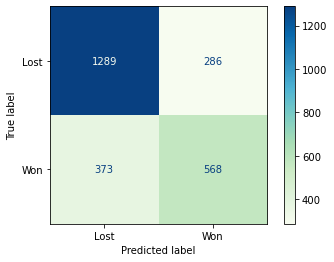

In [45]:
from sklearn.tree import DecisionTreeClassifier
algo(DecisionTreeClassifier)

### Random Forest Classifier

The accuracy of RandomForestClassifier() model is 0.78


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

        Lost       0.77      0.93      0.84      1575
         Won       0.82      0.54      0.65       941

    accuracy                           0.78      2516
   macro avg       0.80      0.74      0.75      2516
weighted avg       0.79      0.78      0.77      2516
 

CONFUSION MATRIX 



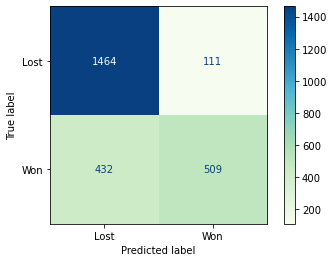

In [46]:
from sklearn.ensemble import RandomForestClassifier
algo(RandomForestClassifier)

### K Nearest Neighbor

The accuracy of KNeighborsClassifier() model is 0.65


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

        Lost       0.70      0.76      0.73      1575
         Won       0.53      0.46      0.49       941

    accuracy                           0.65      2516
   macro avg       0.62      0.61      0.61      2516
weighted avg       0.64      0.65      0.64      2516
 

CONFUSION MATRIX 



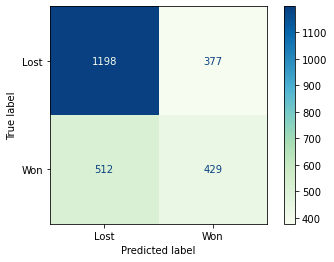

In [47]:
from sklearn.neighbors import KNeighborsClassifier
algo(KNeighborsClassifier)

### Support Vector Machine (SVM)

The accuracy of SVC() model is 0.63


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

        Lost       0.63      1.00      0.77      1575
         Won       0.00      0.00      0.00       941

    accuracy                           0.63      2516
   macro avg       0.31      0.50      0.38      2516
weighted avg       0.39      0.63      0.48      2516
 

CONFUSION MATRIX 



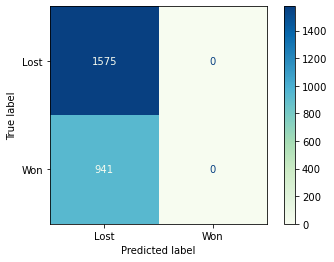

In [48]:
from sklearn.svm import SVC
algo(SVC)

### Linear SVC

The accuracy of LinearSVC() model is 0.63


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

        Lost       0.63      1.00      0.77      1575
         Won       0.00      0.00      0.00       941

    accuracy                           0.63      2516
   macro avg       0.31      0.50      0.38      2516
weighted avg       0.39      0.63      0.48      2516
 

CONFUSION MATRIX 



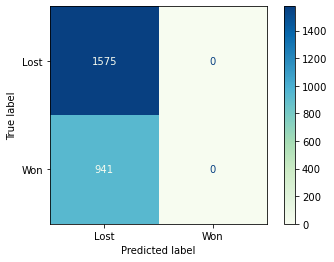

In [49]:
from sklearn.svm import LinearSVC
algo(LinearSVC)

The accuracy of GaussianNB() model is 0.63


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

        Lost       0.63      0.98      0.77      1575
         Won       0.52      0.04      0.07       941

    accuracy                           0.63      2516
   macro avg       0.58      0.51      0.42      2516
weighted avg       0.59      0.63      0.50      2516
 

CONFUSION MATRIX 



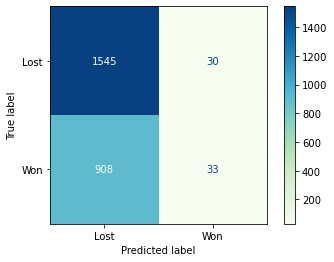

In [50]:
from sklearn.naive_bayes import GaussianNB
algo(GaussianNB)

The accuracy of SGDClassifier() model is 0.63


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

        Lost       0.63      1.00      0.77      1575
         Won       0.00      0.00      0.00       941

    accuracy                           0.63      2516
   macro avg       0.31      0.50      0.38      2516
weighted avg       0.39      0.63      0.48      2516
 

CONFUSION MATRIX 



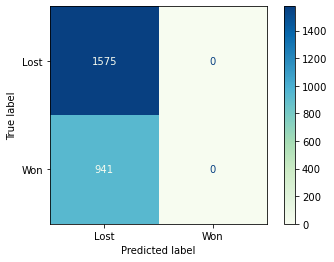

In [51]:
from sklearn.linear_model import SGDClassifier
algo(SGDClassifier)

The accuracy of Perceptron() model is 0.37


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

        Lost       0.00      0.00      0.00      1575
         Won       0.37      1.00      0.54       941

    accuracy                           0.37      2516
   macro avg       0.19      0.50      0.27      2516
weighted avg       0.14      0.37      0.20      2516
 

CONFUSION MATRIX 



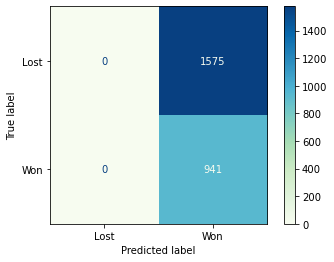

In [52]:
from sklearn.linear_model import Perceptron
algo(Perceptron)

#### From the above results, it is clear that RandomForest Classifier is the best performing model.

### Hyper Parameter Tuning on Random Forest

In [53]:
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators': range(10,20), 
               'max_depth': range(2,6)}]

In [54]:
model = RandomForestClassifier(random_state = 0)

rfc_grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10)

rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': range(2, 6),
                          'n_estimators': range(10, 20)}])

In [55]:
rfc_grid.best_score_

0.6726330212377255

In [56]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=19, random_state=0)

### Step 8: Recommended Top 5 combination of VP and Manager

In [67]:
df_win = df[df['Deal Status Code']=='Won']
df_win[['VP and Manager']].value_counts().nlargest(5)

VP and Manager                 
Long Bergstrom + Russell Dahlen    75
Rahul Bajpai + Rudraksh Sharma     72
neeraj kumar + Molly Eakes         62
Ankita Aggarwal + Desmond Krout    53
neeraj kumar + Vinay Kumar         51
dtype: int64

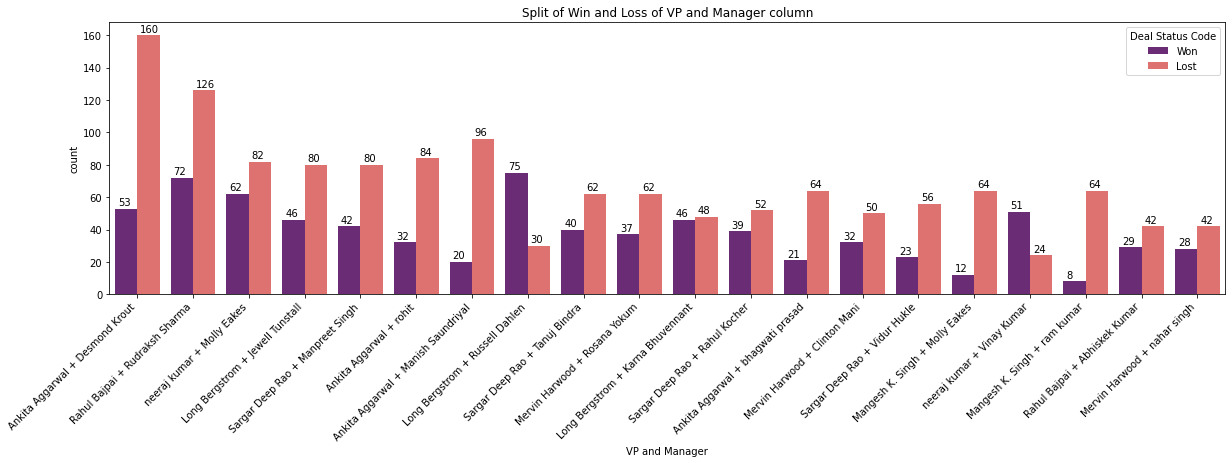

In [68]:
bi_barplot('VP and Manager')

### Step 9: Loss occured for every False prediction

In [69]:
Avg_deal_cost = df['Deal Cost'].mean()

If we choose to use Random Forest Classifier model as the Algorithm for this model - 

The accuracy of RandomForestClassifier() model is 0.79


CLASSIFICATION REPORT 
               precision    recall  f1-score   support

        Lost       0.77      0.93      0.85      1575
         Won       0.83      0.54      0.65       941

    accuracy                           0.79      2516
   macro avg       0.80      0.74      0.75      2516
weighted avg       0.79      0.79      0.77      2516
 

CONFUSION MATRIX 



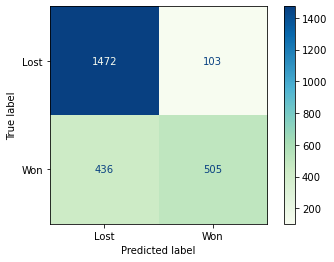

In [70]:
algo(RandomForestClassifier)

The loss in this scenario is when the algo predicts the deal would be lost, but in actual they would win it.  
In such event, the opportunity revenue is lost.  
This is Type II error.  
According to the calculations, the algo might predict 436 False predictions.  
Here the deal cost is the loss.  

In [73]:
print('Loss in case of False Predictions is %.2f' %(Avg_deal_cost))

Loss in case of False Predictions is 766896.87


Another loss is when the algorithm predicts a deal to be won when it actually would be lost.  
In such event, the opportunity cost and cost of effort spent on working on the deal is lost.  
This is Type I error.  
RF algorithm might give 103 such false predictions from a total of 2516 deals.  
This Loss is difficult to predict with current data.

### Step 10: Results, Recommendations and Visualizations

#### Results: 
As seen from our analysis, Random Forest Classifier works best with the given data model with an accuracy of 78%.
#### Recommendations:
Based on extensive analysis and modelling, below are our recommendations to the client:
 - Among the many VP and Manager combitions, the outperforming combinations are -

In [86]:
def Largest_10(col):
    print(df_win[[col]].value_counts().nlargest(10))
Largest_10('VP and Manager')

VP and Manager                   
Long Bergstrom + Russell Dahlen      75
Rahul Bajpai + Rudraksh Sharma       72
neeraj kumar + Molly Eakes           62
Ankita Aggarwal + Desmond Krout      53
neeraj kumar + Vinay Kumar           51
Long Bergstrom + Jewell Tunstall     46
Long Bergstrom + Karna Bhuvennant    46
Sargar Deep Rao + Manpreet Singh     42
Sargar Deep Rao + Tanuj Bindra       40
Ekta Zutshi + Jean Sappington        40
dtype: int64


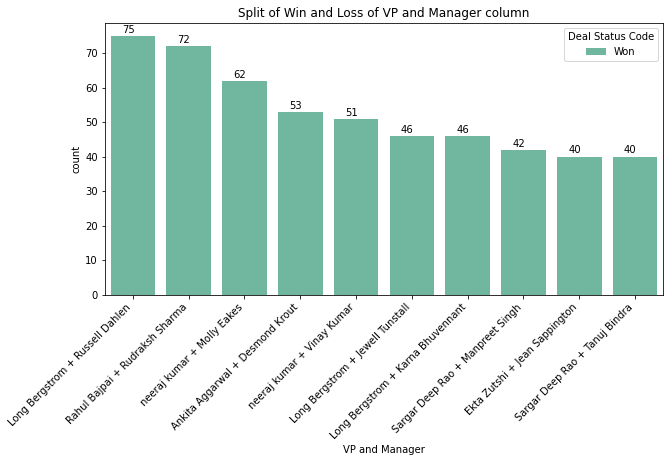

In [106]:
def winplot(x):
    plt.figure(figsize = (10,5))
    ax = sns.countplot(df_win[x],
                  hue = df_win['Deal Status Code'],
                 order = df_win[x].value_counts().nlargest(10).index,
                    palette = "BuGn")
    plt.xticks(rotation = 45, ha = "right")
    plt.title('Split of Win and Loss of {} column'.format(x))
    
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.2, p.get_height()+1));
winplot('VP and Manager')

 - Among the numerous sectors, the sectors that yield high success rate along with quantity of wins are - 

In [87]:
Largest_10('Client Category')

Client Category     
Internal                760
Others                  631
Services_based          408
Tech                    313
Consulting              170
International Bank      160
Telecom                 135
Power ind               112
Finance                 109
Domestic Public Bank     95
dtype: int64


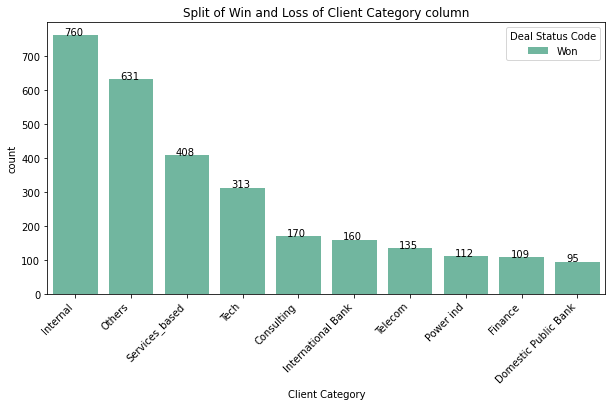

In [107]:
winplot('Client Category')

 - Among the numerous Locations, the ones with the best win rate are - 

In [88]:
Largest_10('Location')

Location
L10         1130
L5           936
L1           660
Others       391
L3           200
L11          135
L12           98
L7            64
L4            62
L9            46
dtype: int64


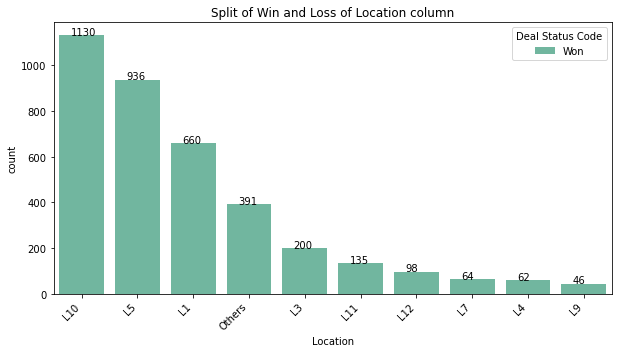

In [108]:
winplot('Location')

 - Among the many sectors, the ones with the highest win rate are - 

In [89]:
Largest_10('Sector')

Sector   
Sector 23    1053
Sector 2      596
Sector 20     389
Sector 24     218
Sector 12     201
Sector 17     200
Sector 9      167
Sector 16     158
Sector 15     153
Sector 25      95
dtype: int64


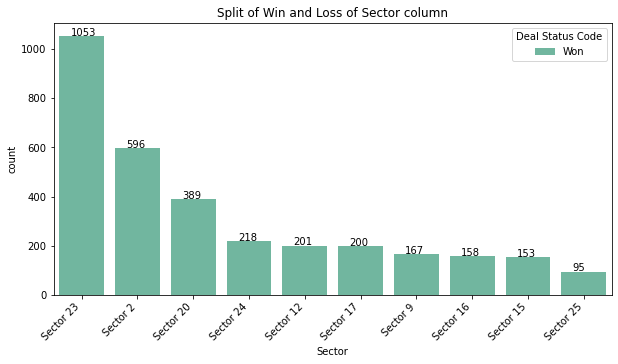

In [109]:
winplot('Sector')

## Conclusion: This marks the end of the Capstone Project.

## Thank you for your guidance and direction on the same.

#### Group K - Team Members
- Kenny.D
- Aditi Goyal
- Lakshmi Deepthi
- Arjun Sreedharan